In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
attorneysFilePath = 'data/attorneys.csv'
attorneyTimeFilePath = 'data/attorneytimeentries.csv'
categoriesFilePath = 'data/categories.csv'
clientsFilePath = 'data/clients.csv'
qPostsFilePath = 'data/questionposts.csv'
questionsFilePath = 'data/questions.csv'
statesFilePath = 'data/statesites.csv'
subCategoriesFilePath = 'data/subcategories.csv'

In [85]:
questionsDF = pd.read_csv(questionsFilePath)
questionsDF.drop(columns = ["QuestionUno", "CategoryUno", "SubcategoryUno", "AskedByClientUno", "AskedOnUtc", "TakenByAttorneyUno", "TakenOnUtc", "ClosedByAttorneyUno", "ClosedOnUtc", "LegalDeadline", "Subcategory"], inplace = True)
print(questionsDF.head())

   Id StateAbbr                      Category
0   1        NC           Family and Children
1   2        NC             Individual Rights
2   3        NC             Individual Rights
3   4        NC           Family and Children
4   5        NC  Consumer Financial Questions


In [86]:
categories = questionsDF["Category"]
frequencies = {}

for category in categories:
    if category in frequencies:
        frequencies[category] += 1
    else:
        frequencies[category] = 1

sortfreq = dict(sorted(frequencies.items(), key = lambda x: x[1], reverse = True))

for key, value in sortfreq.items():
        print("%s: %d" % (key, value))

Family and Children: 88753
Other: 37053
Housing and Homelessness: 34755
Consumer Financial Questions: 17273
Work, Employment and Unemployment: 10187
Individual Rights: 8312
Health and Disability: 2707
Income Maintenance: 2688
Education: 794
Juvenile: 357


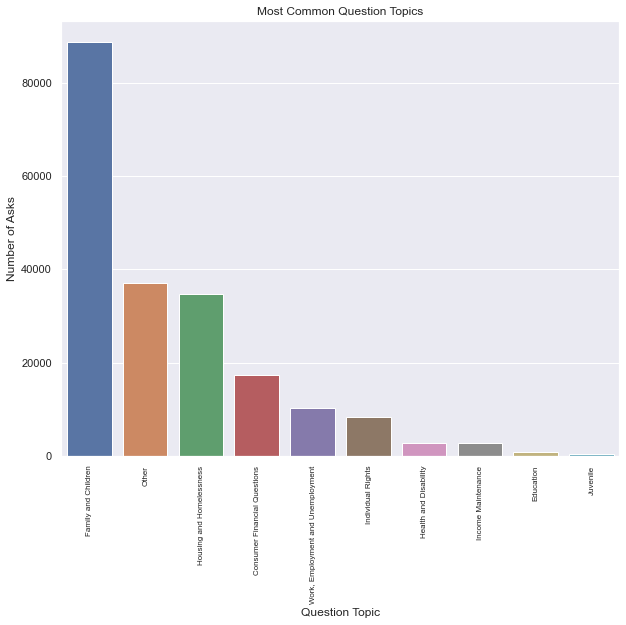

In [87]:
sns.set_theme()
keys = list(sortfreq.keys())
vals = list(sortfreq.values())

plt.figure(figsize = (10,8))
sns.barplot(x = keys, y = vals)

plt.title("Most Common Question Topics")
plt.xticks(rotation = 90, size = 8)
plt.xlabel("Question Topic")
plt.ylabel("Number of Asks")

plt.savefig('figures/commoncategories.png')

In [88]:
NorthEast = ["ME","NH","VT","NY","MA","RI","CT","PA","NJ"]
MidWest = ["ND","MN","WI","MI","OH","IN","IL","IA","SD","NE","KS","MO"]
South = ["MD","DE","WV","VA","KY","NC","SC","TN","GA","AL","MS","FL","AR","LA","OK","TX"]
West = ["WA","OR","ID","MT","WY","CA","NV","UT","CO","AZ","NM","AK","HI"]

NEset = {}
MWset = {}
Sset = {}
Wset = {}

states = questionsDF["StateAbbr"]
categories = questionsDF["Category"]

for i in range(len(states)):
    if states[i] in NorthEast:
        if categories[i] in NEset:
            NEset[categories[i]] += 1
        else:
            NEset[categories[i]] = 1
    elif states[i] in MidWest:
        if categories[i] in MWset:
            MWset[categories[i]] += 1
        else:
            MWset[categories[i]] = 1
    elif states[i] in South:
        if categories[i] in Sset:
            Sset[categories[i]] += 1
        else:
            Sset[categories[i]] = 1
    elif states[i] in West:
        if categories[i] in Wset:
            Wset[categories[i]] += 1
        else:
            Wset[categories[i]] = 1

In [89]:
sortNE = dict(sorted(NEset.items(), key = lambda x: x[1], reverse = True))
sortMW = dict(sorted(MWset.items(), key = lambda x: x[1], reverse = True))
sortS = dict(sorted(Sset.items(), key = lambda x: x[1], reverse = True))
sortW = dict(sorted(Wset.items(), key = lambda x: x[1], reverse = True))

print("NorthEastern states: ")
for key, value in sortNE.items():
        print("%s: %d" % (key, value))
print("\nMidWestern states: ")
for key, value in sortMW.items():
        print("%s: %d" % (key, value))
print("\nSouthern states: ")
for key, value in sortS.items():
        print("%s: %d" % (key, value))
print("\nWestern states: ")
for key, value in sortW.items():
        print("%s: %d" % (key, value))

NorthEastern states: 
Family and Children: 7657
Housing and Homelessness: 5922
Other: 3797
Consumer Financial Questions: 1877
Work, Employment and Unemployment: 1620
Individual Rights: 1061
Income Maintenance: 521
Health and Disability: 365
Education: 139
Juvenile: 22

MidWestern states: 
Family and Children: 28721
Housing and Homelessness: 8869
Other: 8275
Consumer Financial Questions: 5707
Work, Employment and Unemployment: 3141
Individual Rights: 2168
Health and Disability: 737
Income Maintenance: 556
Education: 270
Juvenile: 200

Southern states: 
Family and Children: 45949
Other: 21546
Housing and Homelessness: 17340
Consumer Financial Questions: 8205
Work, Employment and Unemployment: 4825
Individual Rights: 4474
Health and Disability: 1455
Income Maintenance: 1423
Education: 369
Juvenile: 121

Western states: 
Family and Children: 6426
Other: 3130
Housing and Homelessness: 2624
Consumer Financial Questions: 1484
Individual Rights: 609
Work, Employment and Unemployment: 601
Incom

In [90]:
def my_level_list(data):
    result = []
    for key, value in data.items():
        if (value*100/np.sum(list(data.values()))) > 3:
            result.append(key)
        else:
            result.append('')
    return result

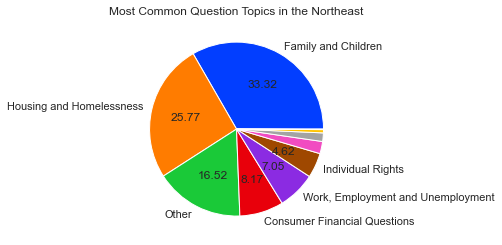

In [91]:
palette_color = sns.color_palette('bright')

keys = list(sortNE.keys())
vals = list(sortNE.values())

plt.pie(vals, labels=my_level_list(sortNE), colors=palette_color, autopct=lambda pct: '%.2f' % pct if pct > 3 else '')
plt.title("Most Common Question Topics in the Northeast")
plt.savefig('figures/northeast.png')

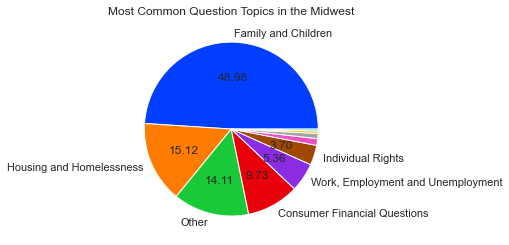

In [92]:
keys = list(sortMW.keys())
vals = list(sortMW.values())

plt.pie(vals, labels=my_level_list(sortNE), colors=palette_color, autopct=lambda pct: '%.2f' % pct if pct > 3 else '')
plt.title("Most Common Question Topics in the Midwest")
plt.savefig('figures/midwest.png')

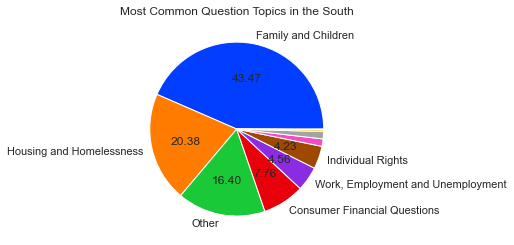

In [93]:
keys = list(sortS.keys())
vals = list(sortS.values())

plt.pie(vals, labels=my_level_list(sortNE), colors=palette_color, autopct=lambda pct: '%.2f' % pct if pct > 3 else '')
plt.title("Most Common Question Topics in the South")
plt.savefig('figures/south.png')

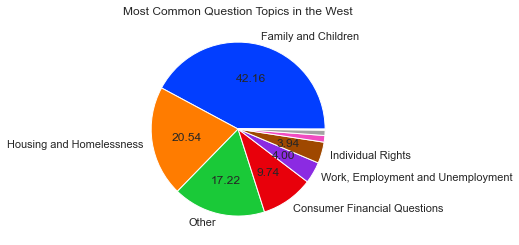

In [94]:
keys = list(sortW.keys())
vals = list(sortW.values())

plt.pie(vals, labels=my_level_list(sortNE), colors=palette_color, autopct=lambda pct: '%.2f' % pct if pct > 3 else '')
plt.title("Most Common Question Topics in the West")
plt.savefig('figures/west.png')